# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [4]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import torch

from agent import Agent, BATCH_SIZE, BUFFER_SIZE

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [6]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

UnityTimeOutException: The Unity environment took too long to respond. Make sure that :
	 The environment does not need user interaction to launch
	 The Academy and the External Brain(s) are attached to objects in the Scene
	 The environment and the Python interface have compatible versions.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    break
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0


When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
env_info = env.reset(train_mode=True)[brain_name]
print(env_info)

from models.model_128 import QNetwork
from replay_buffer import ProportionalReplayBuffer

# TODO: create a real seed
seed = 0

model = QNetwork

memory = ProportionalReplayBuffer(action_size, BATCH_SIZE, BUFFER_SIZE, alpha=0.5, beta0=0.1, beta_inc=0.02, seed=seed)
agent = Agent(state_size, action_size, model, memory, seed=0)

NameError: name 'env' is not defined

In [12]:
def step_env(action):
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0] 
    done = env_info.local_done[0]  
    return (next_state, reward, done)

In [ ]:
model_name = 'dqn_128'

def dqn(n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # the target score after each episode
    target_score = 13
    
    # list containing scores from each episode
    scores = []
    
    # the number of consecultive times that the target score has been reached
    reached_score_times = 0
    
    # last 100 scores
    scores_window = deque(maxlen=100)
    
    # initialize epsilon
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = step_env(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
#         eps = max(eps_end, eps_decay*eps) # decrease epsilon
        eps = max(eps_end,eps_start-(eps_start-eps_end)/250*i_episode) 
#         eps = max(eps_end, eps_start/i_episode)
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
#         if i_episode % 1 == 0:
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}\tEpsilon: {:.2f}'.format(i_episode, score, np.mean(scores_window), eps))
        
        if score >= target_score:
            reached_score_times += 1
        else:
            reached_score_times = 0
        
        if reached_score_times > 100:
            break
    
    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    torch.save(agent.qnetwork_local.state_dict(), f'checkpoint_{model_name}.pth')
    pickle.dump(scores, open(f'score_{model_name}.pkl', 'wb'))
    
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 1	Score: 0.00	Average Score: 0.00	Epsilon: 1.00
Episode 2	Score: 0.00	Average Score: 0.00	Epsilon: 0.99
Episode 3	Score: -1.00	Average Score: -0.33	Epsilon: 0.99
Episode 4	Score: 0.00	Average Score: -0.25	Epsilon: 0.98
Episode 5	Score: 0.00	Average Score: -0.20	Epsilon: 0.98
Episode 6	Score: -1.00	Average Score: -0.33	Epsilon: 0.98
Episode 7	Score: 1.00	Average Score: -0.14	Epsilon: 0.97
Episode 8	Score: -1.00	Average Score: -0.25	Epsilon: 0.97
Episode 9	Score: 0.00	Average Score: -0.22	Epsilon: 0.96
Episode 10	Score: -1.00	Average Score: -0.30	Epsilon: 0.96
Episode 11	Score: -1.00	Average Score: -0.36	Epsilon: 0.96
Episode 12	Score: 0.00	Average Score: -0.33	Epsilon: 0.95
Episode 13	Score: 1.00	Average Score: -0.23	Epsilon: 0.95
Episode 14	Score: 0.00	Average Score: -0.21	Epsilon: 0.94
Episode 15	Score: 0.00	Average Score: -0.20	Epsilon: 0.94
Episode 16	Score: 1.00	Average Score: -0.12	Epsilon: 0.94
Episode 17	Score: 0.00	Average Score: -0.12	Epsilon: 0.93
Episode 18	Score: 0.

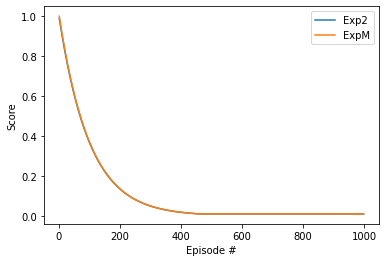

In [34]:
eps_start=1.0
eps_end=0.01
eps_decay=0.995


eps_1 = lambda i_episode: max(eps_end, eps_decay**(i_episode)) # decrease epsilon
eps_5 = lambda i_episode: max(eps_end, eps_decay**(2*i_episode)) # decrease epsilon
eps_2 = lambda i_episode: max(eps_end, eps_start-(eps_start-eps_end)/250*i_episode)
eps_4 = lambda i_episode: max(eps_end, eps_start-(eps_start-eps_end)/50*i_episode)
eps_3 = lambda i_episode: max(eps_end, eps_start/i_episode)

episodes = range(1, 1000)

r = []
eps = eps_start
for i_episode in episodes:
    r.append(eps)
    eps = max(eps_end, eps_decay**2*eps)

fig = plt.figure()
ax = fig.add_subplot(111)
# plt.plot(episodes, [eps_1(i) for i in episodes], label='Exp')
plt.plot(episodes, [eps_5(i) for i in episodes], label='Exp2')
plt.plot(episodes, r, label='ExpM')
# plt.plot(episodes, [eps_2(i) for i in episodes], label='Mod1')
# plt.plot(episodes, [eps_4(i) for i in episodes], label='Mod2')
# plt.plot(episodes, [eps_3(i) for i in episodes], label='Linear')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()